# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

## Задание

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report


Чтение и анализ данных

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


Описание данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


Значения целевой переменной

In [5]:
data['affair'].unique()

array([1, 0], dtype=int64)

Формируем набор признаков и целевую переменную

In [6]:
X = data[data.columns[:-1]]
y = data['affair']

создаем модели классификации

In [7]:
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Обучаем модель

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Получаем прогнозные значения модели (y_pred)

In [11]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [12]:
# вероятности положительного класса
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:5]

array([[0.64685183, 0.35314817],
       [0.41783309, 0.58216691],
       [0.723681  , 0.276319  ],
       [0.69894931, 0.30105069],
       [0.47297002, 0.52702998]])

Оценка модели LogisticRegression

In [13]:
# оценка модели на обучающей выборке
model.score(X_train, y_train)

0.7268850987432675

In [14]:
# оценка модели на тестовой выборке
model.score(X_test, y_test)

0.7219895287958115

Оценка модели DecisionTreeClassifier

In [15]:
# оценка модели на обучающей выборке
model_tree.score(X_train, y_train)

0.9445691202872532

In [16]:
# оценка модели на тестовой выборке
model_tree.score(X_test, y_test)

0.6481675392670158

### Оценка качества модели LogisticRegression

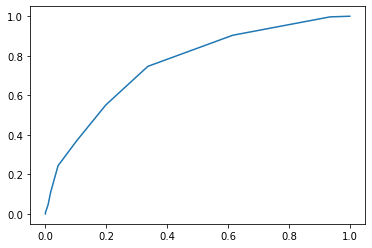

In [32]:
tp # True positive
fp # False positive
fn # False negative
tn # True negative

y_pred_prob = model.predict_proba(X_test)

# p = len([item for item in y_pred_prob[:,1] if item > 0.5])
# n = len(y_pred_prob) - p

p = sum(y_test)
n = len(y_test) - p

fpr = [] # false positive rate
tpr = [] # true positive rate

thresholds = np.arange(0.0, 1.1, 0.1)

for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    
    for predicted, actual in zip(y_pred_prob[:,1], y_test):
        
        if predicted > threshold:
            predicted = 1

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    fpr.append(fp/n)

    tpr.append(tp/p)

plt.plot(fpr, tpr)    
    

In [18]:
tp, fp, fn, tn

(0, 0, 635, 1275)

In [19]:
# true positive rate - доля правильно предсказанных среди класса 1

tpr = tp/(tp+fn)
tpr

0.0

In [20]:
# false positive rate - доля неправильно предсказанных среди класса 0

fpr = fp/(fp+tn)
fpr

0.0

#### Расчет fpr, tpr с помощью sklearn.metrics.roc_curve

In [21]:
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

In [22]:
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of LogisticRegression')

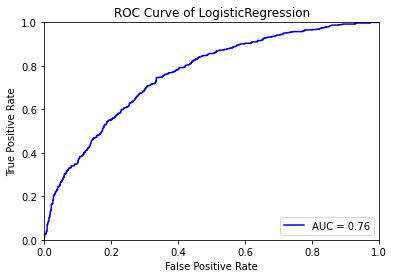

In [23]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {round(roc_auc, 2)}')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LogisticRegression')

#### построение графика precision-recall

Text(0.5, 0, 'recall')

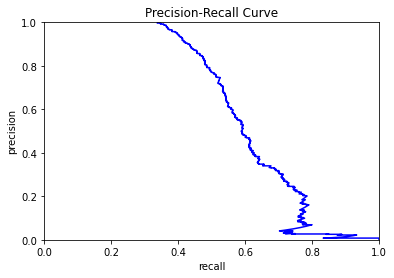

In [31]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1])

plt.title('Precision-Recall Curve')
plt.plot(precision, recall, 'b')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('precision')
plt.xlabel('recall')


In [29]:
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))


Recall: 0.3716535433070866
Precision: 0.6413043478260869

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81      1275
           1       0.64      0.37      0.47       635

    accuracy                           0.72      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.72      0.70      1910

